In [7]:
import json
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np
import random
import os

# Read the JSON file
# with open('dataset/parsed_files/!.json') as file:
# grab a random file
random_file = random.choice(os.listdir('parsed_files'))
print(random_file)
random_file = "Infection.json"
print(random_file)
with open('parsed_files/' + random_file) as file:
    data = json.load(file)

[Girls Week] - Problem.json
Infection.json


In [8]:
def custom_sort_key(step):
    if step == '0000':
        return (0, step)  # All zeroes
    elif step.count('1') == 1 and '2' not in step and '3' not in step and 'M' not in step:
        return (1, step)  # Only one '1'
    elif step.count('1') > 1 and '2' not in step and '3' not in step and 'M' not in step:
        return (2, step)  # Multiple '1's
    elif step.count('2') == 1 and '1' not in step and '3' not in step and 'M' not in step:
        return (3, step)  # Only one '2'
    elif step.count('2') > 1 and '1' not in step and '3' not in step and 'M' not in step:
        return (4, step)  # Multiple '2's
    elif step.count('3') == 1 and '1' not in step and '2' not in step and 'M' not in step:
        return (5, step)  # Only one '3'
    elif step.count('3') > 1 and '1' not in step and '2' not in step and 'M' not in step:
        return (6, step)  # Multiple '3's
    elif 'M' not in step:
        return (7, step)  # Steps without letters
    else:
        return (8, step)

/home/lcros/GrooveGuru/dataset/Infection/Infection.mp3
5656320 11048


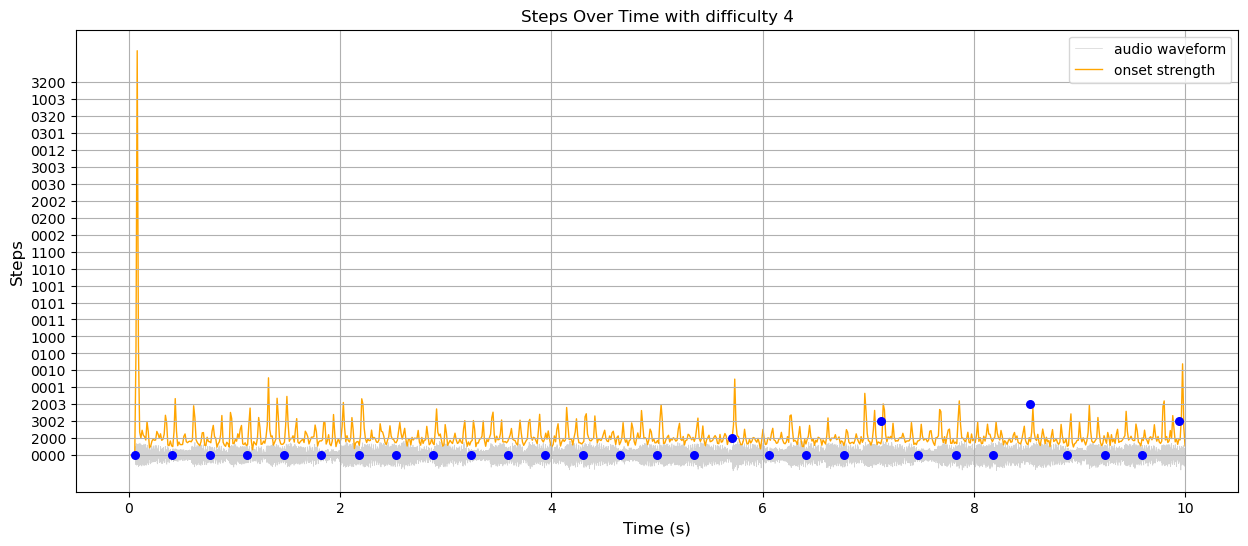

5656320 11048


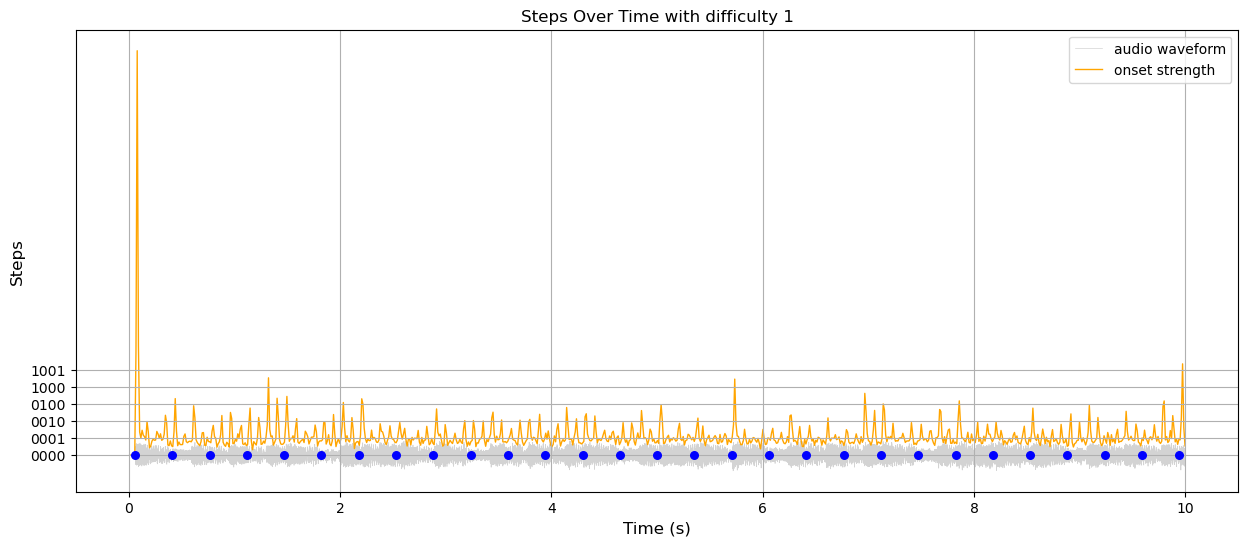

5656320 11048


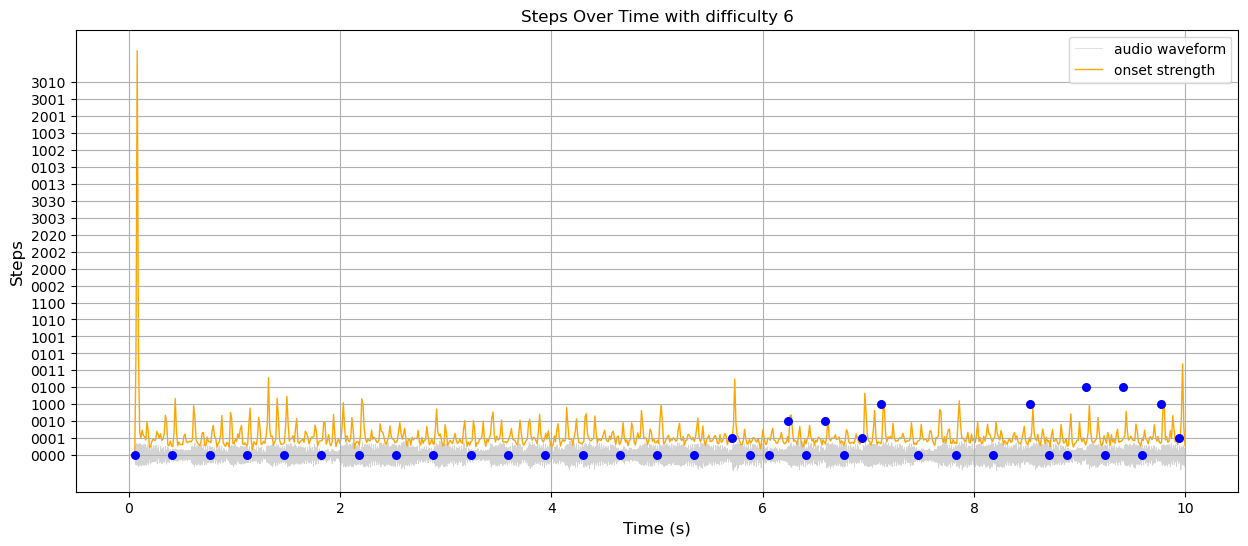

5656320 11048


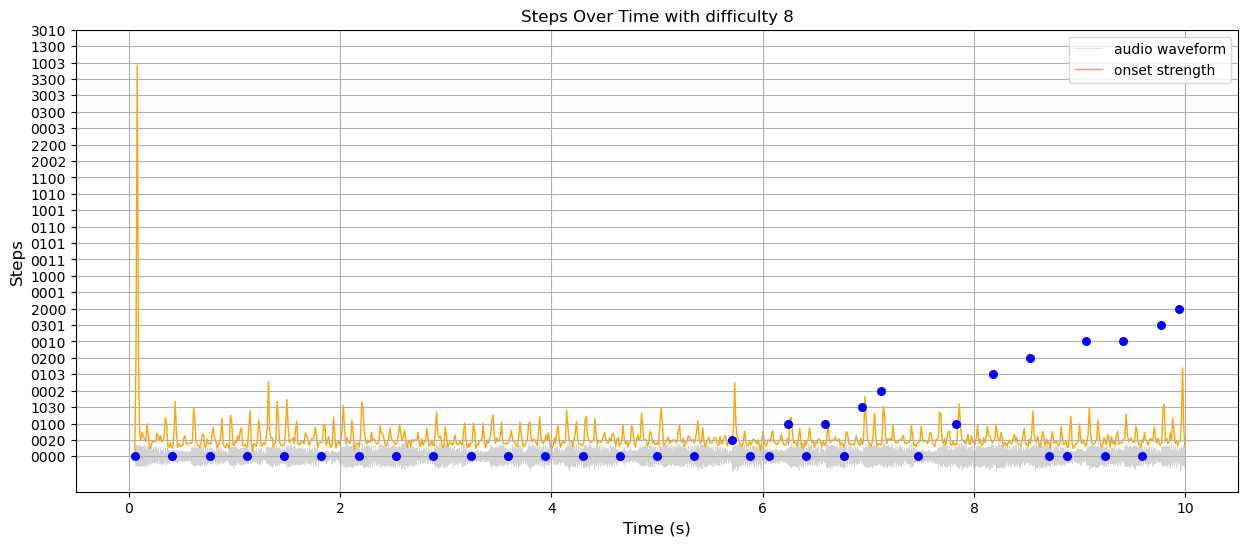

5656320 11048


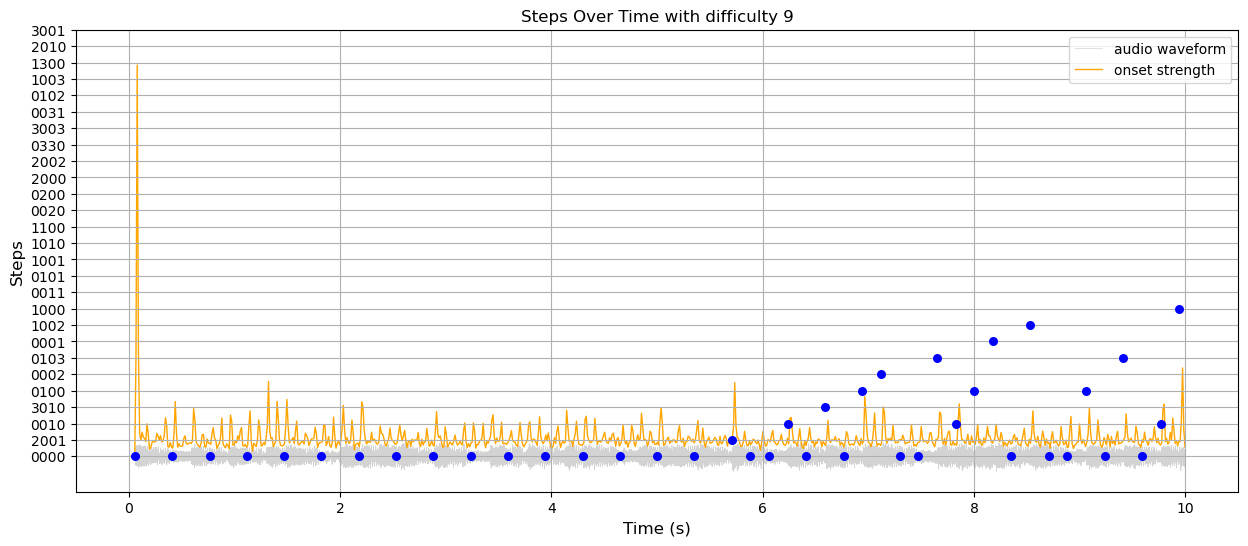

In [ ]:
import librosa
print(data['music_fp'])

for chart in data['charts']:
    if chart['type'] != 'dance-single':
        continue
    # Extract time and step values from the JSON data
    time_values = [entry[0] for entry in chart['notes']]
    step_values = [entry[1] for entry in chart['notes']]

    # Convert the time values to float and step values to string
    time_values = list(map(float, time_values))
    step_values = list(map(str, step_values))
    
    audio_data, sample_rate = sf.read(data['music_fp'])
    
    
    # create an onset envelope
    onset_env = librosa.onset.onset_strength(y=audio_data[:, 0], sr=sample_rate)
    
    print(len(audio_data), len(onset_env))
    # get the onset times
    onset_times = librosa.times_like(onset_env, sr=sample_rate)
    
    # Create a time axis for the audio waveform
    audio_duration = len(audio_data) / sample_rate
    audio_time = np.linspace(0, audio_duration, len(audio_data))

    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 6))

    # Plot the audio waveform as the background
    # from 0 to 10 seconds
    idx1 = np.where(audio_time)[0][0]
    idx2 = np.where(audio_time > 10)[0][0]
    ax.plot(audio_time[idx1:idx2], audio_data[idx1:idx2,0], color='lightgray', linewidth=0.5, zorder=1, label='audio waveform')
    idx1 = np.where(onset_times)[0][0]
    idx2 = np.where(onset_times > 10)[0][0]
    ax.plot(onset_times[idx1:idx2], onset_env[idx1:idx2], color='orange', linewidth=1, zorder=1, label='onset strength')

    # Plot the steps over time
    idx1 = np.where(np.array(time_values))[0][0]
    idx2 = np.where(np.array(time_values) > 10)[0][0]
    ax.scatter(time_values[idx1:idx2], step_values[idx1:idx2], color='blue', marker='o', s=30, zorder=2)

    ax.set_xlabel('Time (s)', fontsize=12)
    ax.set_ylabel('Steps', fontsize=12)
    # set y axis to have all unique steps
    # ax.set_yticks(list(unique_steps))
    ax.set_yticks(list(sorted(set(step_values), key=custom_sort_key)))
    ax.set_title('Steps Over Time with difficulty {}'.format(chart['difficulty_fine']))
    ax.grid(True)
    ax.legend(loc='upper right')

    plt.show()

/tmp/ipykernel_2479820/3192970709.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


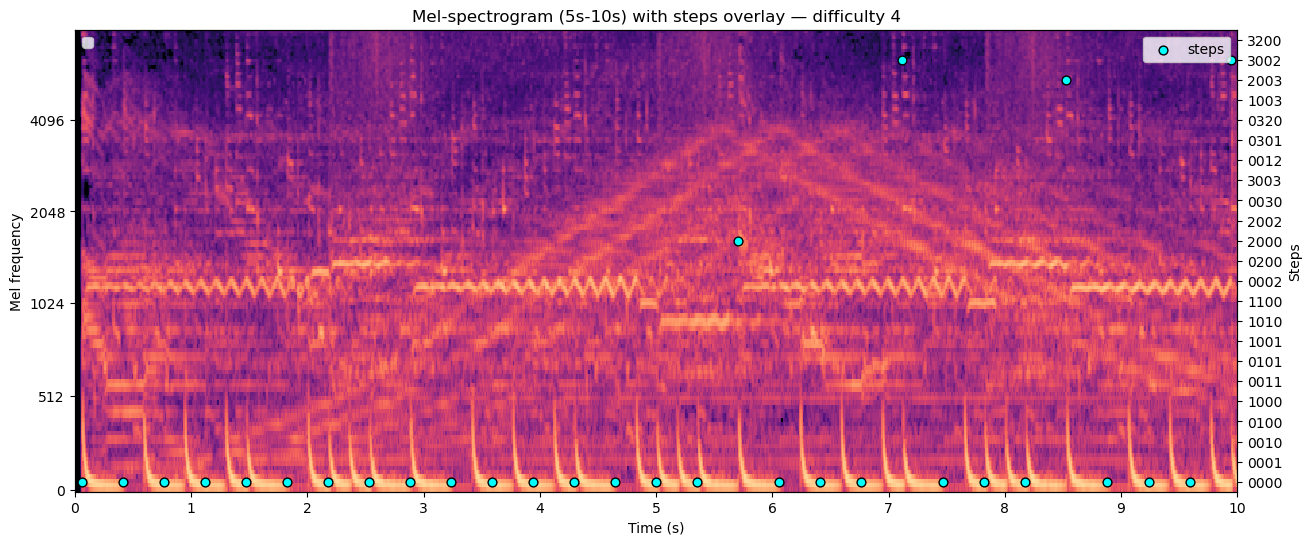

/tmp/ipykernel_2479820/3192970709.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


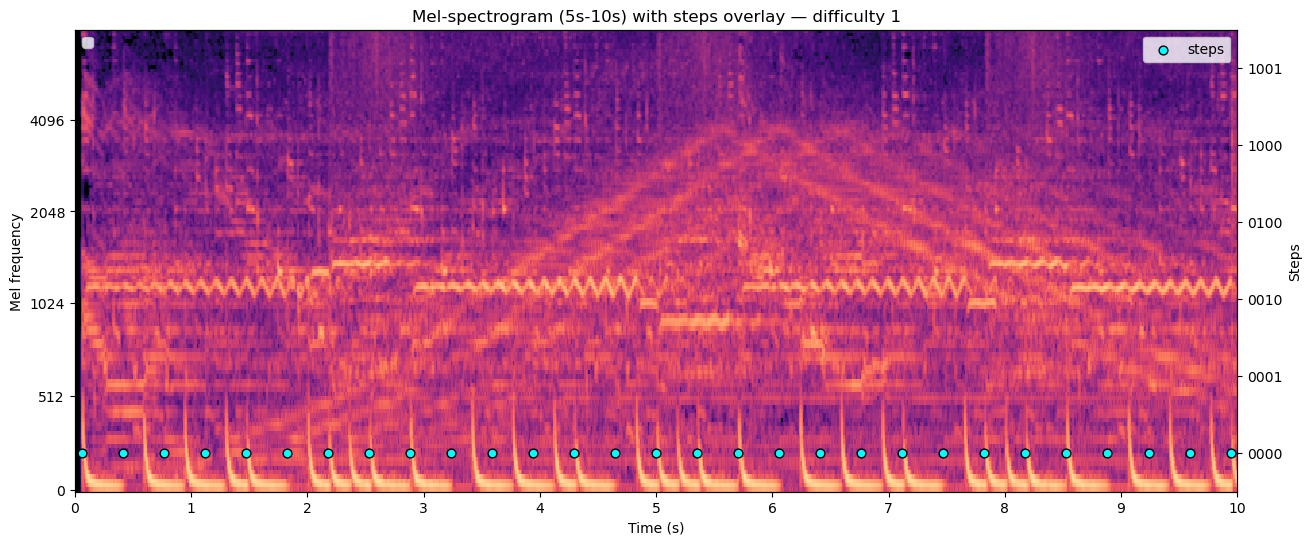

/tmp/ipykernel_2479820/3192970709.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


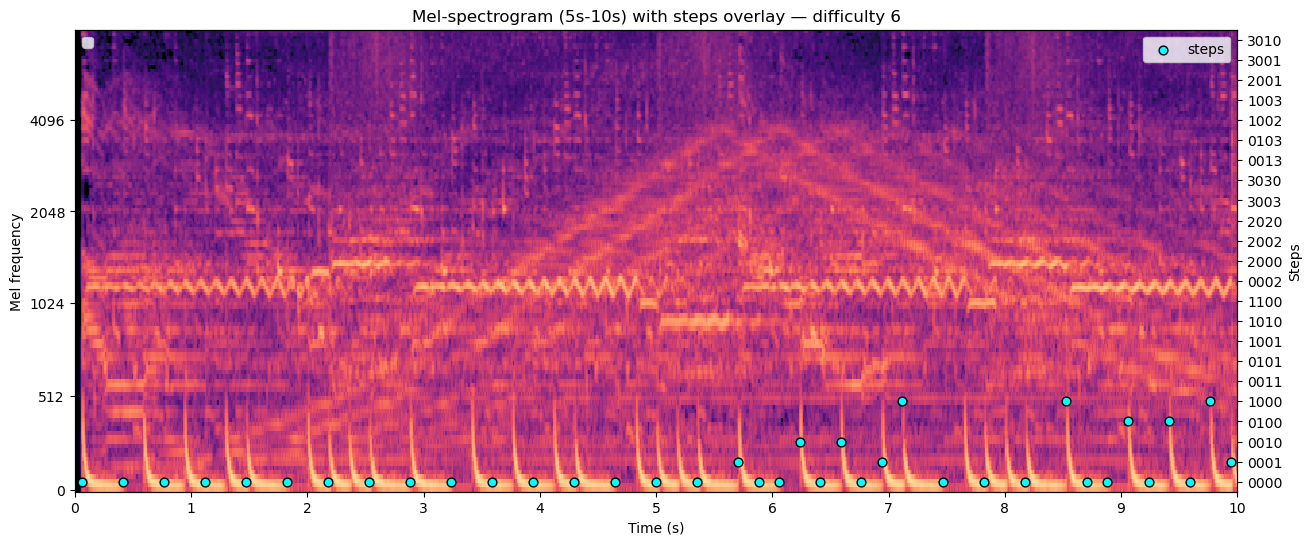

/tmp/ipykernel_2479820/3192970709.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


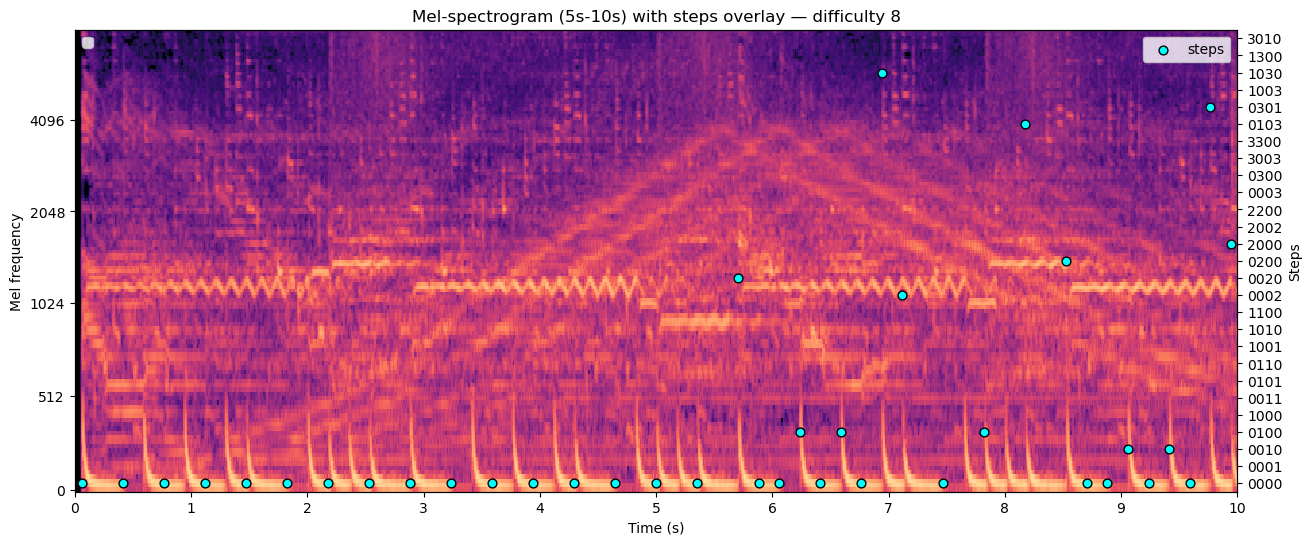

/tmp/ipykernel_2479820/3192970709.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


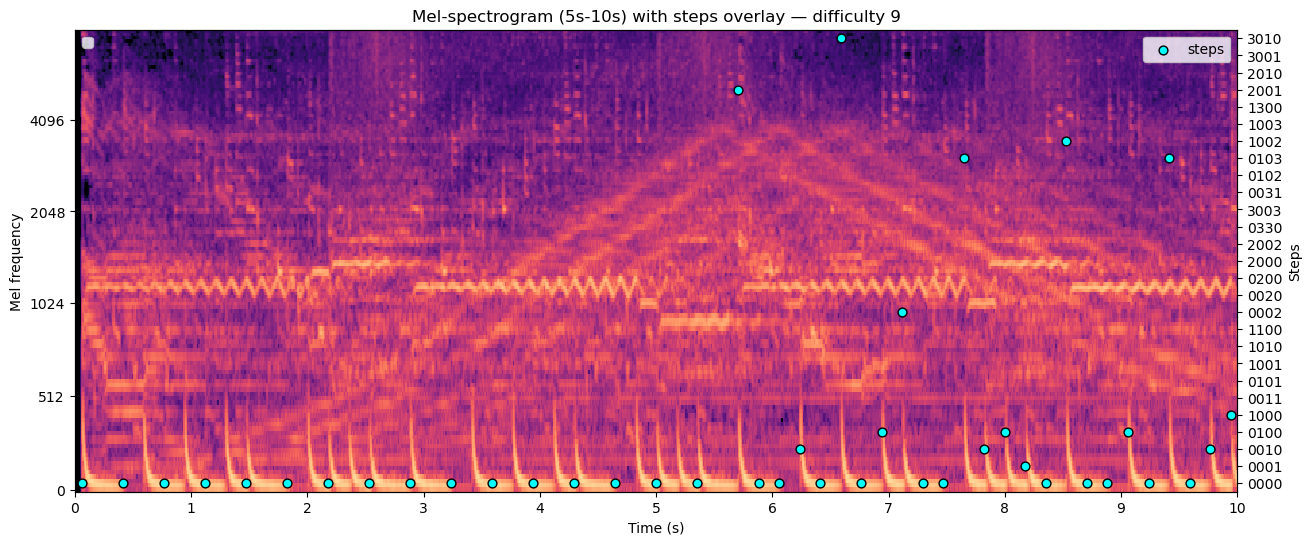

In [14]:
for chart in data['charts']:
    if chart['type'] != 'dance-single':
        continue

    # Extract time and step values from the JSON data
    time_values = [float(entry[0]) for entry in chart['notes']]
    step_values = [str(entry[1]) for entry in chart['notes']]

    # Load audio (use first channel if stereo)
    audio_data, sample_rate = sf.read(data['music_fp'])
    if audio_data.ndim > 1:
        y = audio_data[:, 0]
    else:
        y = audio_data

    # Mel-spectrogram parameters
    n_fft = 2048
    hop_length = 512
    n_mels = 128
    fmax = 8000

    # Compute mel spectrogram and convert to dB
    S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=n_fft,
                                       hop_length=hop_length, n_mels=n_mels, fmax=fmax)
    S_db = librosa.power_to_db(S, ref=np.max)

    # Times for mel frames
    mel_times = librosa.frames_to_time(np.arange(S.shape[1]), sr=sample_rate, hop_length=hop_length)

    # Choose a time window (same as before: 5s -> 10s)
    try:
        mel_idx1 = np.where(mel_times)[0][0]
        mel_idx2 = np.where(mel_times > 10)[0][0]
        step_idx1 = np.where(np.array(time_values)[0][0])[0][0]
        step_idx2 = np.where(np.array(time_values) > 10)[0][0]
    except Exception:
        # fallback to full range if the window isn't available
        mel_idx1, mel_idx2 = 0, S.shape[1]
        step_idx1, step_idx2 = 0, len(time_values)

    # Plot
    fig, ax = plt.subplots(figsize=(15, 6))
    # Display full mel spectrogram but limit x-axis to desired window
    librosa.display.specshow(S_db, sr=sample_rate, hop_length=hop_length,
                             x_axis='time', y_axis='mel', fmax=fmax, ax=ax, cmap='magma')
    ax.set_xlim(0, 10)
    ax.set_title('Mel-spectrogram (5s-10s) with steps overlay — difficulty {}'.format(chart['difficulty_fine']))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Mel frequency')

    # Prepare and plot step categories on a twin y-axis
    unique_steps = list(sorted(set(step_values), key=custom_sort_key))
    step_to_idx = {s: i for i, s in enumerate(unique_steps)}

    ax_steps = ax.twinx()
    # Map step values in the selected time window to integer indices
    window_times = time_values[step_idx1:step_idx2]
    window_steps = step_values[step_idx1:step_idx2]
    step_idxs = [step_to_idx[s] for s in window_steps]

    ax_steps.scatter(window_times, step_idxs, color='cyan', edgecolor='k', s=40, zorder=3, label='steps')
    ax_steps.set_ylim(-0.5, len(unique_steps) - 0.5)
    ax_steps.set_yticks(range(len(unique_steps)))
    ax_steps.set_yticklabels(unique_steps)
    ax_steps.set_ylabel('Steps')

    ax.legend(loc='upper left')
    ax_steps.legend(loc='upper right')

    plt.show()

In [4]:
# go over all files and try to load the audio file with sf. If there is an error, print the file name
for file in os.listdir('parsed_files'):
    try:
        with open('parsed_files/' + file) as f:
            data = json.load(f)
            audio_data, sample_rate = sf.read(data['music_fp'])
    except Exception as e:
        print(file, e)
        # find all files that have the same ending in the same folder
        failed_music_file = data['music_fp']
        folder = failed_music_file.split('/')[-2]
        print(os.listdir('dataset/' + folder))
        # if one of them is '.ogg' or '.mp3', use that file
        for f in os.listdir('dataset/' + folder):
            if f.endswith('.ogg') or f.endswith('.mp3'):
                data['music_fp'] = 'dataset/' + folder + '/' + f
                print(data['music_fp'])
                audio_data, sample_rate = sf.read(data['music_fp'])
                # save the new json file
                with open('parsed_files/' + file, 'w') as f:
                    json.dump(data, f)
                continue

Note: Illegal Audio-MPEG-Header 0x9a90210b at offset 2866133.
Note: Trying to resync...
Note: Skipped 591 bytes in input.
Note: Illegal Audio-MPEG-Header 0x88fffab2 at offset 3066563.
Note: Trying to resync...
Note: Skipped 1 bytes in input.
Note: Illegal Audio-MPEG-Header 0x4c595249 at offset 2474385.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?


Pluto the First.json Error opening '/home/lcros/GrooveGuru/dataset/Pluto the First/Pluto The First.ogg': System error.
['Pluto the First.sm', 'Pluto the First.png']
roppongi EVOLVED -ver.D-.json Error opening '/home/lcros/GrooveGuru/dataset/roppongi EVOLVED -ver.D-/roppongi EVOLVED ver_D.mp3': System error.
['roppongi EVOLVED -ver.D-.dwi', 'roppongi EVOLVED -ver.D-.sm', 'roppongi EVOLVED -ver.D-.png', 'roppongi EVOLVED -ver.D--bg.png']
Hold My Hand [DDR ADDICT Ver.].json Error opening '/home/lcros/GrooveGuru/dataset/Hold My Hand [DDR ADDICT Ver.]/Hold My Hand.ogg': System error.
['Hold My Hand [DDR ADDICT Ver.].ssc', 'Hold My Hand [DDR ADDICT Ver.].sm', 'Hold My Hand [DDR ADDICT Ver.]-jacket.png', 'Hold My Hand [DDR ADDICT Ver.].png', 'Hold My Hand [DDR ADDICT Ver.]-bg.png']


[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
Note: Illegal Audio-MPEG-Header 0x50455441 at offset 3395193.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_extra():684] error: No extra frame text / valid description?


[Mid Speed] - Lookin' Like Magic.json Error opening "/home/lcros/GrooveGuru/dataset/[Mid Speed] - Lookin' Like Magic/Lookin' Like Magic.ogg": System error.
["[Mid Speed] - Lookin' Like Magic.sm", "[Mid Speed] - Lookin' Like Magic.avi", 'cdtitle.png', "[Mid Speed] - Lookin' Like Magic.ssc"]


[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:INT123_parse_new_id3():950] warning: ID3v2: unrealistic small tag lengh 0, skipping
[src/libmpg123/id3.c:INT123_parse_new_id3():950] warning: ID3v2: unrealistic small tag lengh 0, skipping
[src/libmpg123/id3.c:INT123_parse_new_id3():950] warning: ID3v2: unrealistic small tag lengh 0, skipping
[src/libmpg123/id3.c:INT123_parse_new_id3():950] warning: ID3v2: unrealistic small tag lengh 0, skipping
[src/libmpg123/id3.c:INT123_parse_new_id3():950] warning: ID3v2: unrealistic small tag lengh 0, skipping
[src/libmpg123/id3.c:INT123_parse_n

Believe (ONE PIECE OPENING THEME).json Unspecified internal error.
['Believe (ONE PIECE OPENING THEME).lrc', 'Believe (ONE PIECE OPENING THEME).mp3', 'Believe (ONE PIECE OPENING THEME).avi', 'Believe (ONE PIECE OPENING THEME).png', 'Believe (ONE PIECE OPENING THEME).dwi', 'Believe (ONE PIECE OPENING THEME)-bg.png', 'Believe (ONE PIECE OPENING THEME).sm']
dataset/Believe (ONE PIECE OPENING THEME)/Believe (ONE PIECE OPENING THEME).mp3


[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?


LibsndfileError: Unspecified internal error.